In [4]:
#%%writefile Detections2Features2.py
import sys
import numpy as np
import pickle as pkl
import cv2
%pylab inline

if __name__=='__main__':
    DATA_DIR =sys.argv[1]
animal = 'DK55'
section = 188
CH='CH3'
DATA_DIR = '/data/cell_segmentation/DK55/CH3/%d'%section
print('DATA_DIR=%s'%(DATA_DIR))
!ls -lh $DATA_DIR

Populating the interactive namespace from numpy and matplotlib
DATA_DIR=/data/cell_segmentation/DK55/CH3/188
total 1.8G
-rwxrwxrwx 1 zhw272 dklab 6.2M Oct  8 18:31 188tile-0.tif
-rwxrwxrwx 1 zhw272 dklab 5.0M Oct  8 18:31 188tile-1.tif
-rwxrwxrwx 1 zhw272 dklab  80M Oct  8 18:31 188tile-2.tif
-rwxrwxrwx 1 zhw272 dklab  88M Oct  8 18:32 188tile-3.tif
-rwxrwxrwx 1 zhw272 dklab 130M Oct  8 18:32 188tile-4.tif
-rwxrwxrwx 1 zhw272 dklab 110M Oct  8 18:32 188tile-5.tif
-rwxrwxrwx 1 zhw272 dklab  55M Oct  8 18:32 188tile-6.tif
-rwxrwxrwx 1 zhw272 dklab  56M Oct  8 18:32 188tile-7.tif
-rwxrwxrwx 1 zhw272 dklab 654K Oct  8 18:32 188tile-8.tif
-rwxrwxrwx 1 zhw272 dklab 294K Oct  8 18:32 188tile-9.tif
-rwxrwxrwx 1 zhw272 dklab 4.1K Oct 18 17:41 DK55_premotor_188_2021-10-18.csv
-rw-rw-r-- 1 zhw272 dklab 1.3G Nov  8 12:00 extracted_cells_188.pkl
-rw-rw-r-- 1 zhw272 dklab 4.0K Nov  4 15:12 puntas_188.csv


In [5]:
%%time
with open(DATA_DIR+'/extracted_cells_%d.pkl'%section,'br') as pkl_file:
    E=pkl.load(pkl_file)
    Examples=E['Examples']

CPU times: user 67.2 ms, sys: 422 ms, total: 489 ms
Wall time: 488 ms


In [6]:
[len(Example) for Example in Examples]

[10, 10, 172, 3788, 40, 2427]

In [7]:
thresh=2000

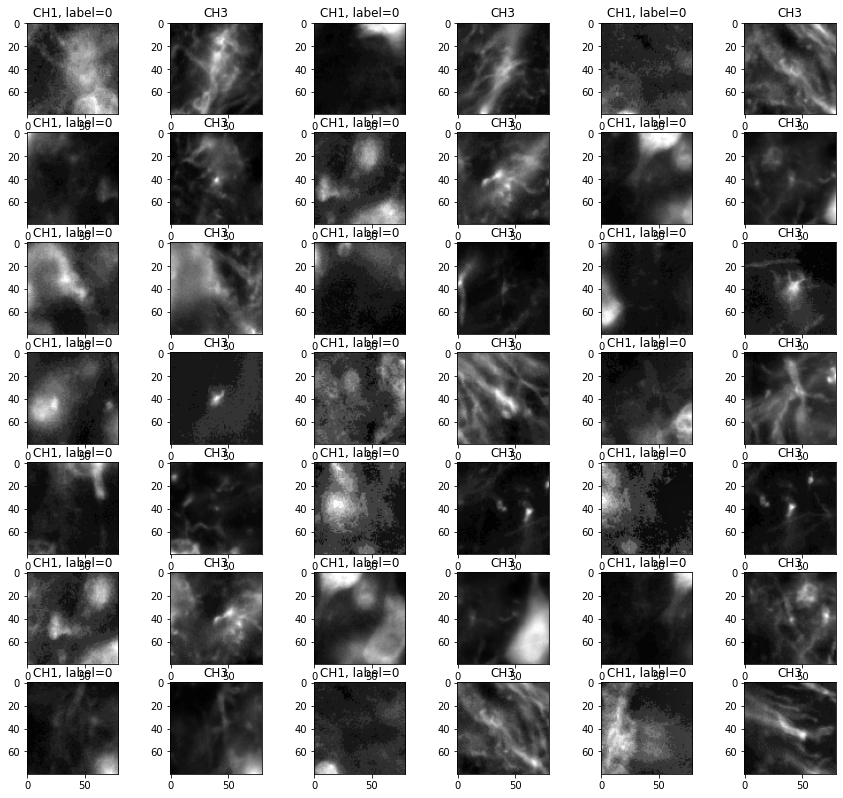

In [11]:
plt.figure(figsize=[15,30])
tile=5
E=Examples[tile]
j=0
for i in range(len(E)):
    e=E[i]
    
    label=e['label']
    if label==1:
        continue
    subplot(15,6,2*j+1)
    imshow(e['image_CH1'][40:120,40:120],cmap='gray')
    title('CH1, label=%d'%label)
    subplot(15,6,2*j+2)
    imshow(e['image_CH3'][40:120,40:120],cmap='gray')
    title('CH3')
    j+=1
    if j>20:
        break

In [9]:
shape(e['image_CH1'])

(160, 160)

In [ ]:
plt.figure(figsize=[15,30])
for i in range(len(positives)):
    plt.subplot(30,10,2*i+1)
    plt.imshow(positives[i][2][40:120,40:120], cmap="gray")
    plt.subplot(30,10,2*i+2)
    plt.imshow(positives[i][3][40:120,40:120], cmap="gray")
    if i>50:
        break
plt.show()

In [ ]:
    Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))

    if Stats[1] is None:
        continue
    seg=Stats[1]

    # Isolate the connected component at the middle of seg
    middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
    middle_seg=seg[middle[0],middle[1]]
    middle_seg_mask = np.uint8(seg==middle_seg)

    # Calculate Moments
    moments = cv2.moments(middle_seg_mask)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)

    features={'h%d'%i:huMoments[i,0]  for i in range(7)}
    features.update(moments)

    for key in ['animal','section','index','label','area','height2','width2']:
        features[key]=e[key]

    features['row']=e['row_center']+e['origin'][0]
    features['col']=e['col_center']+e['origin'][0]

    if df_dict==None:
        df_dict={}
        for key in features:
            df_dict[key]=[]

    for key in features:
        df_dict[key].append(features[key])


import pandas as pd
df=pd.DataFrame(df_dict)
outfile=DATA_DIR+'/puntas.csv'
print('df shape=',df.shape,'output_file=',outfile)

df.to_csv(outfile)

In [ ]:
e

In [ ]:
!head $DATA_DIR/puntas.csv

In [ ]:
import cv2
thresh=2000
Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))
Stats[0]

In [ ]:
seg=Stats[1]
imshow(seg)


In [ ]:
middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
middle

In [ ]:
middle_seg=seg[middle[0],middle[1]]
middle_seg

In [ ]:
Stats[2][middle_seg],e['area']

In [ ]:
for key in ['index','label','area','height2','width2']:
    features[key]=e[key]
features

In [ ]:
# Calculate Moments
moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [ ]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:10]
    plt.figure()
    plt.plot(H,np.arange(0,1,1./H.shape[0]))
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);

In [ ]:
plot_dist(e['image']);

In [ ]:
hist(e['image'].flatten());